In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

Reading dataset using read_csv() function from pandas

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
# checking for Null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# Data cleaning
# Dropping columns
df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] ,axis=1, inplace=True)

As most of the values in column 3,4,5 are Null values we are dropping the columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
# Checking for duplicates
df.duplicated().sum()

403

In [13]:
# Dropping duplicates
df=df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
df["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [17]:
# Renaming columns
df.rename(columns={'v1':'target', 'v2':'sms'},inplace=True)

In [18]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.describe()

,target,sms
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [20]:
df.nunique()

target       2
sms       5169
dtype: int64

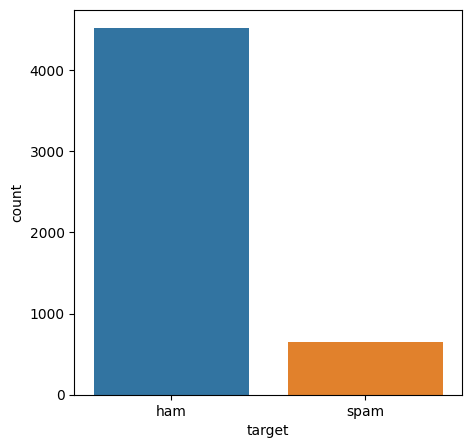

In [21]:
# Data visualization
plt.figure(figsize=(5,5))
sns.countplot(x='target',data = df)
plt.show()

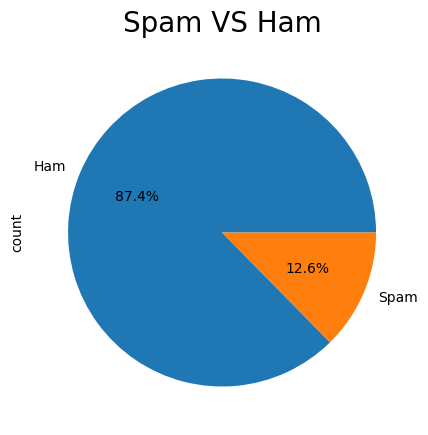

In [22]:
# Data visualization
plt.figure(figsize=(5,5))
df.target.value_counts().plot(kind="pie",labels=["Ham", "Spam"],autopct='%1.1f%%')
plt.title('Spam VS Ham',size=20)
plt.show()

In [23]:
x=df['sms']
y=df['target']

In [24]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 16)

In [25]:
x_train.shape



(4135,)

In [26]:
x_test.shape

(1034,)

In [27]:
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


The data in column: sms is of object type we are converting it to int.
CountVectorizer()  function is used to covert the data.

In [28]:
x_train_cv = cv.fit_transform(x_train)
X_test_cv = cv.transform(x_test)

In [29]:
# Training the model
lr=LogisticRegression()

In [30]:
lr.fit(x_train_cv,y_train)

LogisticRegression()

In [31]:
# Testing the model
y_predict=lr.predict(X_test_cv)

In [32]:
print('Accuracy_Score:',accuracy_score(y_test,y_predict))

Accuracy_Score: 0.9758220502901354


In [33]:
df = pd.DataFrame({'Actual labels': y_test , "Predicted labels": y_predict})
df

,Actual labels,Predicted labels
4908,ham,ham
945,ham,ham
2722,ham,ham
2170,ham,ham
989,ham,ham
...,...,...
1220,spam,spam
3570,ham,ham
4273,ham,ham
3489,ham,ham


In [34]:
print('Accuracy:',accuracy_score(y_test,y_predict)*100)

Accuracy: 97.58220502901354
